# 6. Stability AI

## SDXL 0.8

In [12]:
# This legacy model version will be unavailable on Apr 30, 2024.

## SDXL 1.0

SDXL generates images of high quality in virtually any art style and is the best open model for photorealism. Distinct images can be prompted without having any particular ‘feel’ imparted by the model, ensuring absolute freedom of style. SDXL 1.0 is particularly well-tuned for vibrant and accurate colors, with better contrast, lighting, and shadows than its predecessor, all in native 1024x1024 resolution. In addition, SDXL can generate concepts that are notoriously difficult for image models to render, such as hands and text or spatially arranged compositions (e.g., a woman in the background chasing a dog in the foreground).


| Criteria | Data |
|-----------------|-----------------|
| Supported use cases | Generation of art work, creative tooling, educational applications| 
| Model attributes | Diffusion-based text-to-image generation| 
| Model version | v1 | 
| Max tokens | 77 | 
| Model version | English| 




```json
{
 "modelId": "stability.stable-diffusion-xl-v1",
 "contentType": "application/json",
 "accept": "application/json",
 "body": "{\"text_prompts\":[{\"text\":\"this is where you place your input text\",\"weight\":1}],\"cfg_scale\":10,\"seed\":0,\"steps\":50,\"width\":512,\"height\":512}"
}
```



INFO:__main__:Generating image with SDXL model stability.stable-diffusion-xl-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test


success


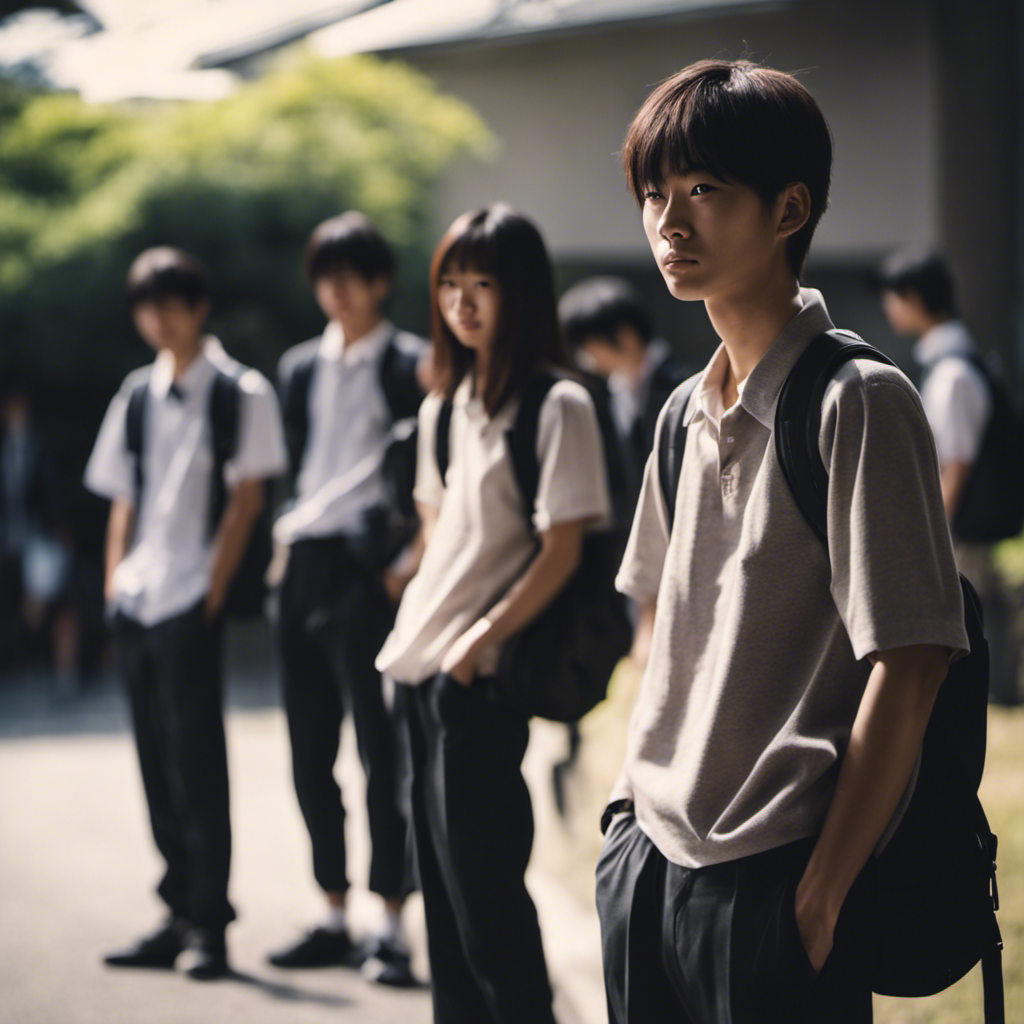

In [11]:
# Text to image

# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to generate an image with SDXL 1.0 (on demand).
"""
import base64
import io
import json
import logging
import boto3
from PIL import Image
import base64
import os

from botocore.exceptions import ClientError

class ImageError(Exception):
    "Custom exception for errors returned by SDXL"
    def __init__(self, message):
        self.message = message


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_image(model_id, body):
    """
    Generate an image using SDXL 1.0 on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        image_bytes (bytes): The image generated by the model.
    """

    logger.info("Generating image with SDXL model %s", model_id)

    bedrock = boto3.Session(profile_name = "sebas").client(service_name='bedrock-runtime')
   
    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )
    response_body = json.loads(response.get("body").read())
    print(response_body['result'])

    base64_image = response_body.get("artifacts")[0].get("base64")
    #base64_bytes = base64_image.encode('ascii')
    #image_bytes = base64.b64decode(base64_bytes)

    #finish_reason = response_body.get("artifacts")[0].get("finishReason")

    #if finish_reason == 'ERROR' or finish_reason == 'CONTENT_FILTERED':
    #    raise ImageError(f"Image generation error. Error code is {finish_reason}")


    #logger.info("Successfully generated image withvthe SDXL 1.0 model %s", model_id)

    return base64_image



def main():
    """
    Entrypoint for SDXL example.
    """

    logging.basicConfig(level = logging.INFO,
                        format = "%(levelname)s: %(message)s")

    model_id='stability.stable-diffusion-xl-v1'

    prompt="""Japanese high school students after class hanging out"""

    # Create request body.
    body=json.dumps({
        "text_prompts": [
        {
        "text": prompt
        }
    ],
    "cfg_scale": 10,
    "seed": 0,
    "steps": 50,
    "samples" : 1,
    "style_preset" : "cinematic"

    })

    try:
        image_bytes=generate_image(model_id = model_id,
                                 body = body)
        
        

        os.makedirs("data", exist_ok=True)
        image_1 = Image.open(io.BytesIO(base64.decodebytes(bytes(image_bytes, "utf-8"))))
        image_1.save("data/image_1.png")
        return image_1
        #image = Image.open(io.BytesIO(image_bytes))


    except ClientError as err:
        message=err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))
    except ImageError as err:
        logger.error(err.message)
        print(err.message)

main()



INFO:__main__:Generating image with SDXL model stability.stable-diffusion-xl-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test


success


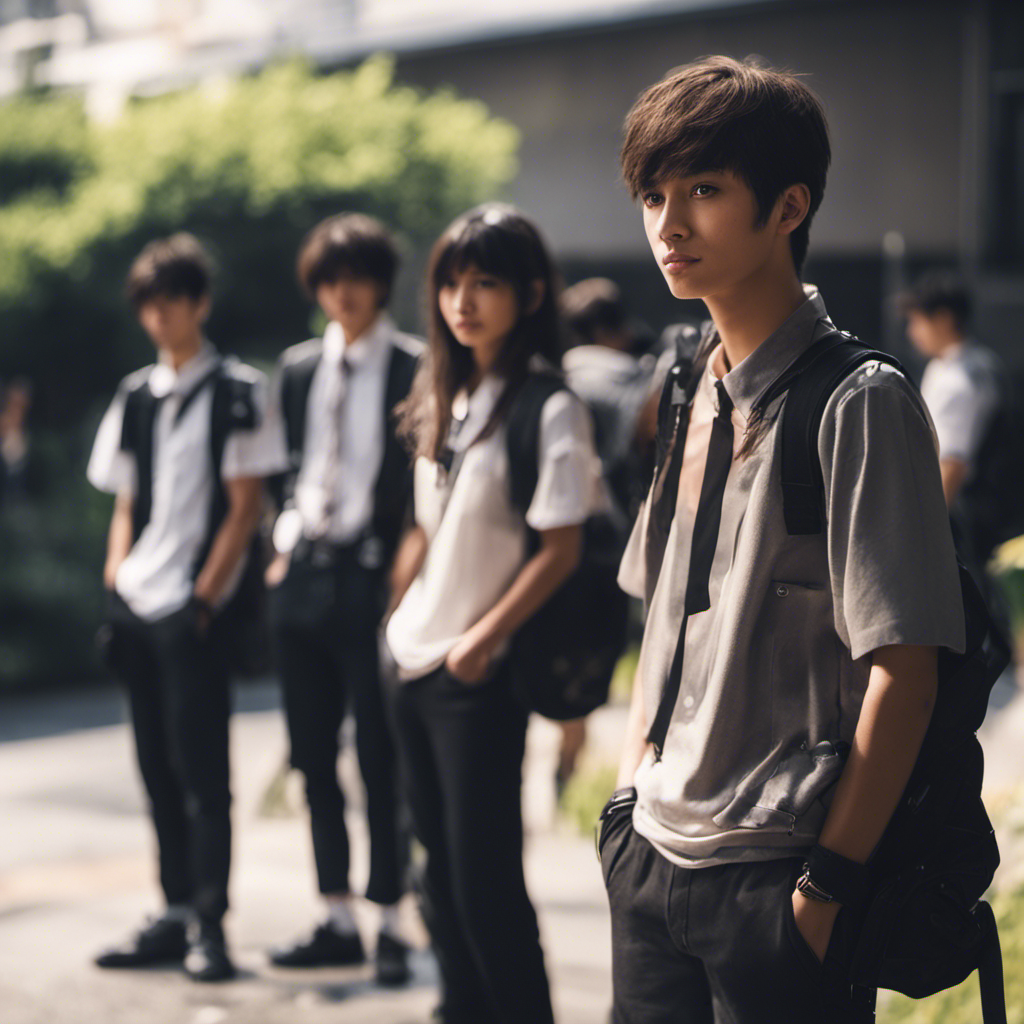

In [21]:
#Image to image

# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to generate an image from a reference image with SDXL 1.0 (on demand).
"""
import base64
import io
import json
import logging
import boto3
from PIL import Image

from botocore.exceptions import ClientError

class ImageError(Exception):
    "Custom exception for errors returned by SDXL"
    def __init__(self, message):
        self.message = message


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_image(model_id, body):
    """
    Generate an image using SDXL 1.0 on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        image_bytes (bytes): The image generated by the model.
    """

    logger.info("Generating image with SDXL model %s", model_id)

    bedrock = boto3.Session(profile_name="sebas").client(service_name='bedrock-runtime')
   
    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )
    response_body = json.loads(response.get("body").read())
    print(response_body['result'])

    base64_image = response_body.get("artifacts")[0].get("base64")
    """ 
    base64_bytes = base64_image.encode('ascii')
    image_bytes = base64.b64decode(base64_bytes)

    finish_reason = response_body.get("artifacts")[0].get("finishReason")

    if finish_reason == 'ERROR' or finish_reason == 'CONTENT_FILTERED':
        raise ImageError(f"Image generation error. Error code is {finish_reason}")

    

    logger.info("Successfully generated image withvthe SDXL 1.0 model %s", model_id)
    """

    return base64_image



def main():
    """
    Entrypoint for SDXL example.
    """

    logging.basicConfig(level = logging.INFO,
                        format = "%(levelname)s: %(message)s")

    model_id='stability.stable-diffusion-xl-v1'

    prompt="""They are international students from latin america"""

    # Read reference image from file and encode as base64 strings.
    with open("./data/image_1.png", "rb") as image_file:
        init_image = base64.b64encode(image_file.read()).decode('utf8')

    # Create request body.
    body=json.dumps({
        "text_prompts": [
        {
        "text": prompt
        }
    ],
    "init_image": init_image,
    "style_preset" : "anime"
    })

    try:
        base64_image=generate_image(model_id = model_id,
                                 body = body)
        
        os.makedirs("data", exist_ok=True)
        image_2 = Image.open(io.BytesIO(base64.decodebytes(bytes(base64_image, "utf-8"))))
        image_2.save("data/image_2.png")
        return image_2
        #image = Image.open(io.BytesIO(image_bytes))
        #image.show()


    except ClientError as err:
        message=err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))
    except ImageError as err:
        logger.error(err.message)
        print(err.message)



main()

